In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from demo import Spotify, Recommender
from demo.lib import DB
from IPython.display import clear_output

# 1.Spotify Search Program

In [5]:
db = DB()

search_sp = Spotify()
search_sp.search()

mailbox_id = db.save_mailbox(search_sp.sel_tracks)
print("우체통 '{}'이 등록되었습니다.".format(mailbox_id))

계속하시려면 아무거나, 종료는 exit를 입력해주세요.exit
우체통 '62908cd50f26e903e1de90e0'이 등록되었습니다.


# Demo1. 편지작성

## 1. 객체 초기화

In [6]:
recommender = Recommender(mailbox_id)
recommender.init_setting()

## 2. 데이터 병합

In [7]:
print("총 {}개의 사용자 음악".format(recommender.user['tracks'].index.size))
recommender.user['tracks'].head()

총 4개의 사용자 음악


,trackId,trackName,artistIds,artistNames,image
0,3kNGEbIhTWU0L6RslcXPXr,Fully Empty,0LyfQWJT6nXafLPZqxe9Of,Various Artists,https://i.scdn.co/image/ab67616d0000b2735c55c8...
1,4T2cOfemKB0owJS2JOu7dF,"Can I Love ? (feat. youra, Meego)",305pg6Bs6Mz9Tm2zK66psY,Cosmic Boy,https://i.scdn.co/image/ab67616d0000b2731f824c...
2,1Bb6jVrsg8cXxMCBxIWJUn,Through the Night,3HqSLMAZ3g3d5poNaI7GOU,IU,https://i.scdn.co/image/ab67616d0000b273582ef1...
3,67Yg0uYQB14o3gQ3RLwD7x,잊어야 한다는 마음으로,0Sr5L3iWPn0k6KnDr8RYS8,Kim Kwang Seok,https://i.scdn.co/image/ab67616d0000b273bf3902...


In [8]:
print("총 {}개의 추천 음악".format(recommender.reco['tracks'].index.size))
recommender.reco['tracks'].head()

총 346개의 추천 음악


,trackId,trackName,artistIds,artistNames,image,seedId
0,67kXYrMTQbS7MVbXyGyxHm,Angels,6LuN9FCkKOj5PcnpouEgny,Khalid,https://i.scdn.co/image/ab67616d0000b273988ede...,3kNGEbIhTWU0L6RslcXPXr
1,6y6jbcPG4Yn3Du4moXaenr,idfc,2cFrymmkijnjDg9SS92EPM,blackbear,https://i.scdn.co/image/ab67616d0000b273bf33fd...,3kNGEbIhTWU0L6RslcXPXr
2,3AKMTInwWSxtMZdDrtUwlb,How much I love you (with Jeong Haeil),4GAVUIrGNz35VbCFfHTsca,saevom,https://i.scdn.co/image/ab67616d0000b273cda6b9...,3kNGEbIhTWU0L6RslcXPXr
3,7t2bFihaDvhIrd2gn2CWJO,"Or Nah (feat. The Weeknd, Wiz Khalifa & DJ Mus...",7c0XG5cIJTrrAgEC3ULPiq,Ty Dolla $ign,https://i.scdn.co/image/ab67616d0000b2731c04ef...,3kNGEbIhTWU0L6RslcXPXr
4,5MZNGxnfhoOro2mvPjtVlA,Warmhearted,6qvVoPGEqNCyYSjYCgfV1v,Choi Yuree,https://i.scdn.co/image/ab67616d0000b2739374ed...,3kNGEbIhTWU0L6RslcXPXr


In [9]:
recommender.merge()
print("총 {}개의 병합 음악".format(recommender.merged['tracks'].index.size))
recommender.merged['tracks'].head()

총 350개의 병합 음악


,trackId,trackName,artistIds,artistNames,image,seedId
0,3kNGEbIhTWU0L6RslcXPXr,Fully Empty,0LyfQWJT6nXafLPZqxe9Of,Various Artists,https://i.scdn.co/image/ab67616d0000b2735c55c8...,NaN
1,4T2cOfemKB0owJS2JOu7dF,"Can I Love ? (feat. youra, Meego)",305pg6Bs6Mz9Tm2zK66psY,Cosmic Boy,https://i.scdn.co/image/ab67616d0000b2731f824c...,NaN
2,1Bb6jVrsg8cXxMCBxIWJUn,Through the Night,3HqSLMAZ3g3d5poNaI7GOU,IU,https://i.scdn.co/image/ab67616d0000b273582ef1...,NaN
3,67Yg0uYQB14o3gQ3RLwD7x,잊어야 한다는 마음으로,0Sr5L3iWPn0k6KnDr8RYS8,Kim Kwang Seok,https://i.scdn.co/image/ab67616d0000b273bf3902...,NaN
4,67kXYrMTQbS7MVbXyGyxHm,Angels,6LuN9FCkKOj5PcnpouEgny,Khalid,https://i.scdn.co/image/ab67616d0000b273988ede...,3kNGEbIhTWU0L6RslcXPXr


## 3. 데이터 전처리

In [10]:
recommender.data_preprocessing()

In [11]:
recommender.features['default'][:5, 1:]

array([[0.859, 0.494, 0.264, 0.0, 1, 0.134, -11.197, 0.0486, 113.654,
        0.37],
       [0.555, 0.708, 0.441, 4.52e-06, 5, 0.121, -4.212, 0.0623, 79.958,
        0.275],
       [0.754, 0.401, 0.311, 0.0, 8, 0.279, -7.327, 0.0437, 79.197,
        0.282],
       [0.542, 0.622, 0.188, 5.22e-05, 7, 0.076, -19.679, 0.0271,
        139.939, 0.146],
       [0.959, 0.472, 0.265, 0.000499, 6, 0.1, -10.059, 0.0356, 111.558,
        0.204]], dtype=object)

In [12]:
recommender.features['norm'][:5]

array([[0.8783210928442782, 0.4422827496757457, 0.23867138454514322, 0.0,
        0.09090909090909091, 0.11890936632163596, 0.5377476936514002,
        0.06064387322186174, 0.41401390786548925, 0.3346007604562738],
       [0.5674774980935268, 0.7198443579766536, 0.4407031160826389,
        1.6028368794326244e-05, 0.45454545454545453, 0.10249936884625094,
        0.919045799443201, 0.09483404042924883, 0.18496237534922608,
        0.22836054573920825],
       [0.7709573512362884, 0.3216601815823606, 0.2923182285127268, 0.0,
        0.7272727272727273, 0.3019439535470841, 0.7490037665811452,
        0.0484152732717744, 0.1797894107170776, 0.23618877208678146],
       [0.5541848443706328, 0.6083009079118028, 0.15192329642734845,
        0.00018510638297872343, 0.6363636363636364, 0.045695531431456694,
        0.07473115344724056, 0.006987771400049914, 0.5926885141151919,
        0.08409751733392976],
       [0.980572275328078, 0.4137483787289234, 0.23981280675721947,
        0.00176950354

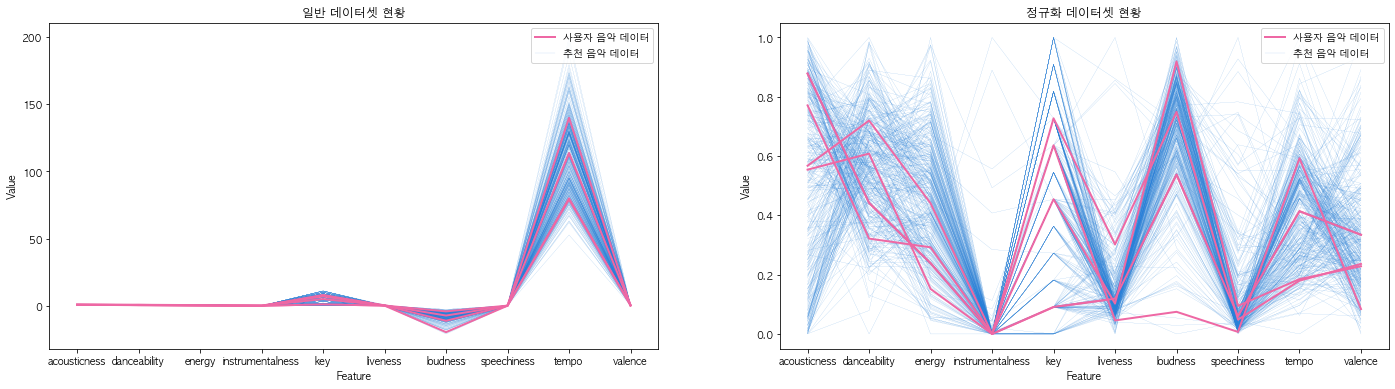

In [13]:
recommender.draw_dataset()

## 4. KMeans Run

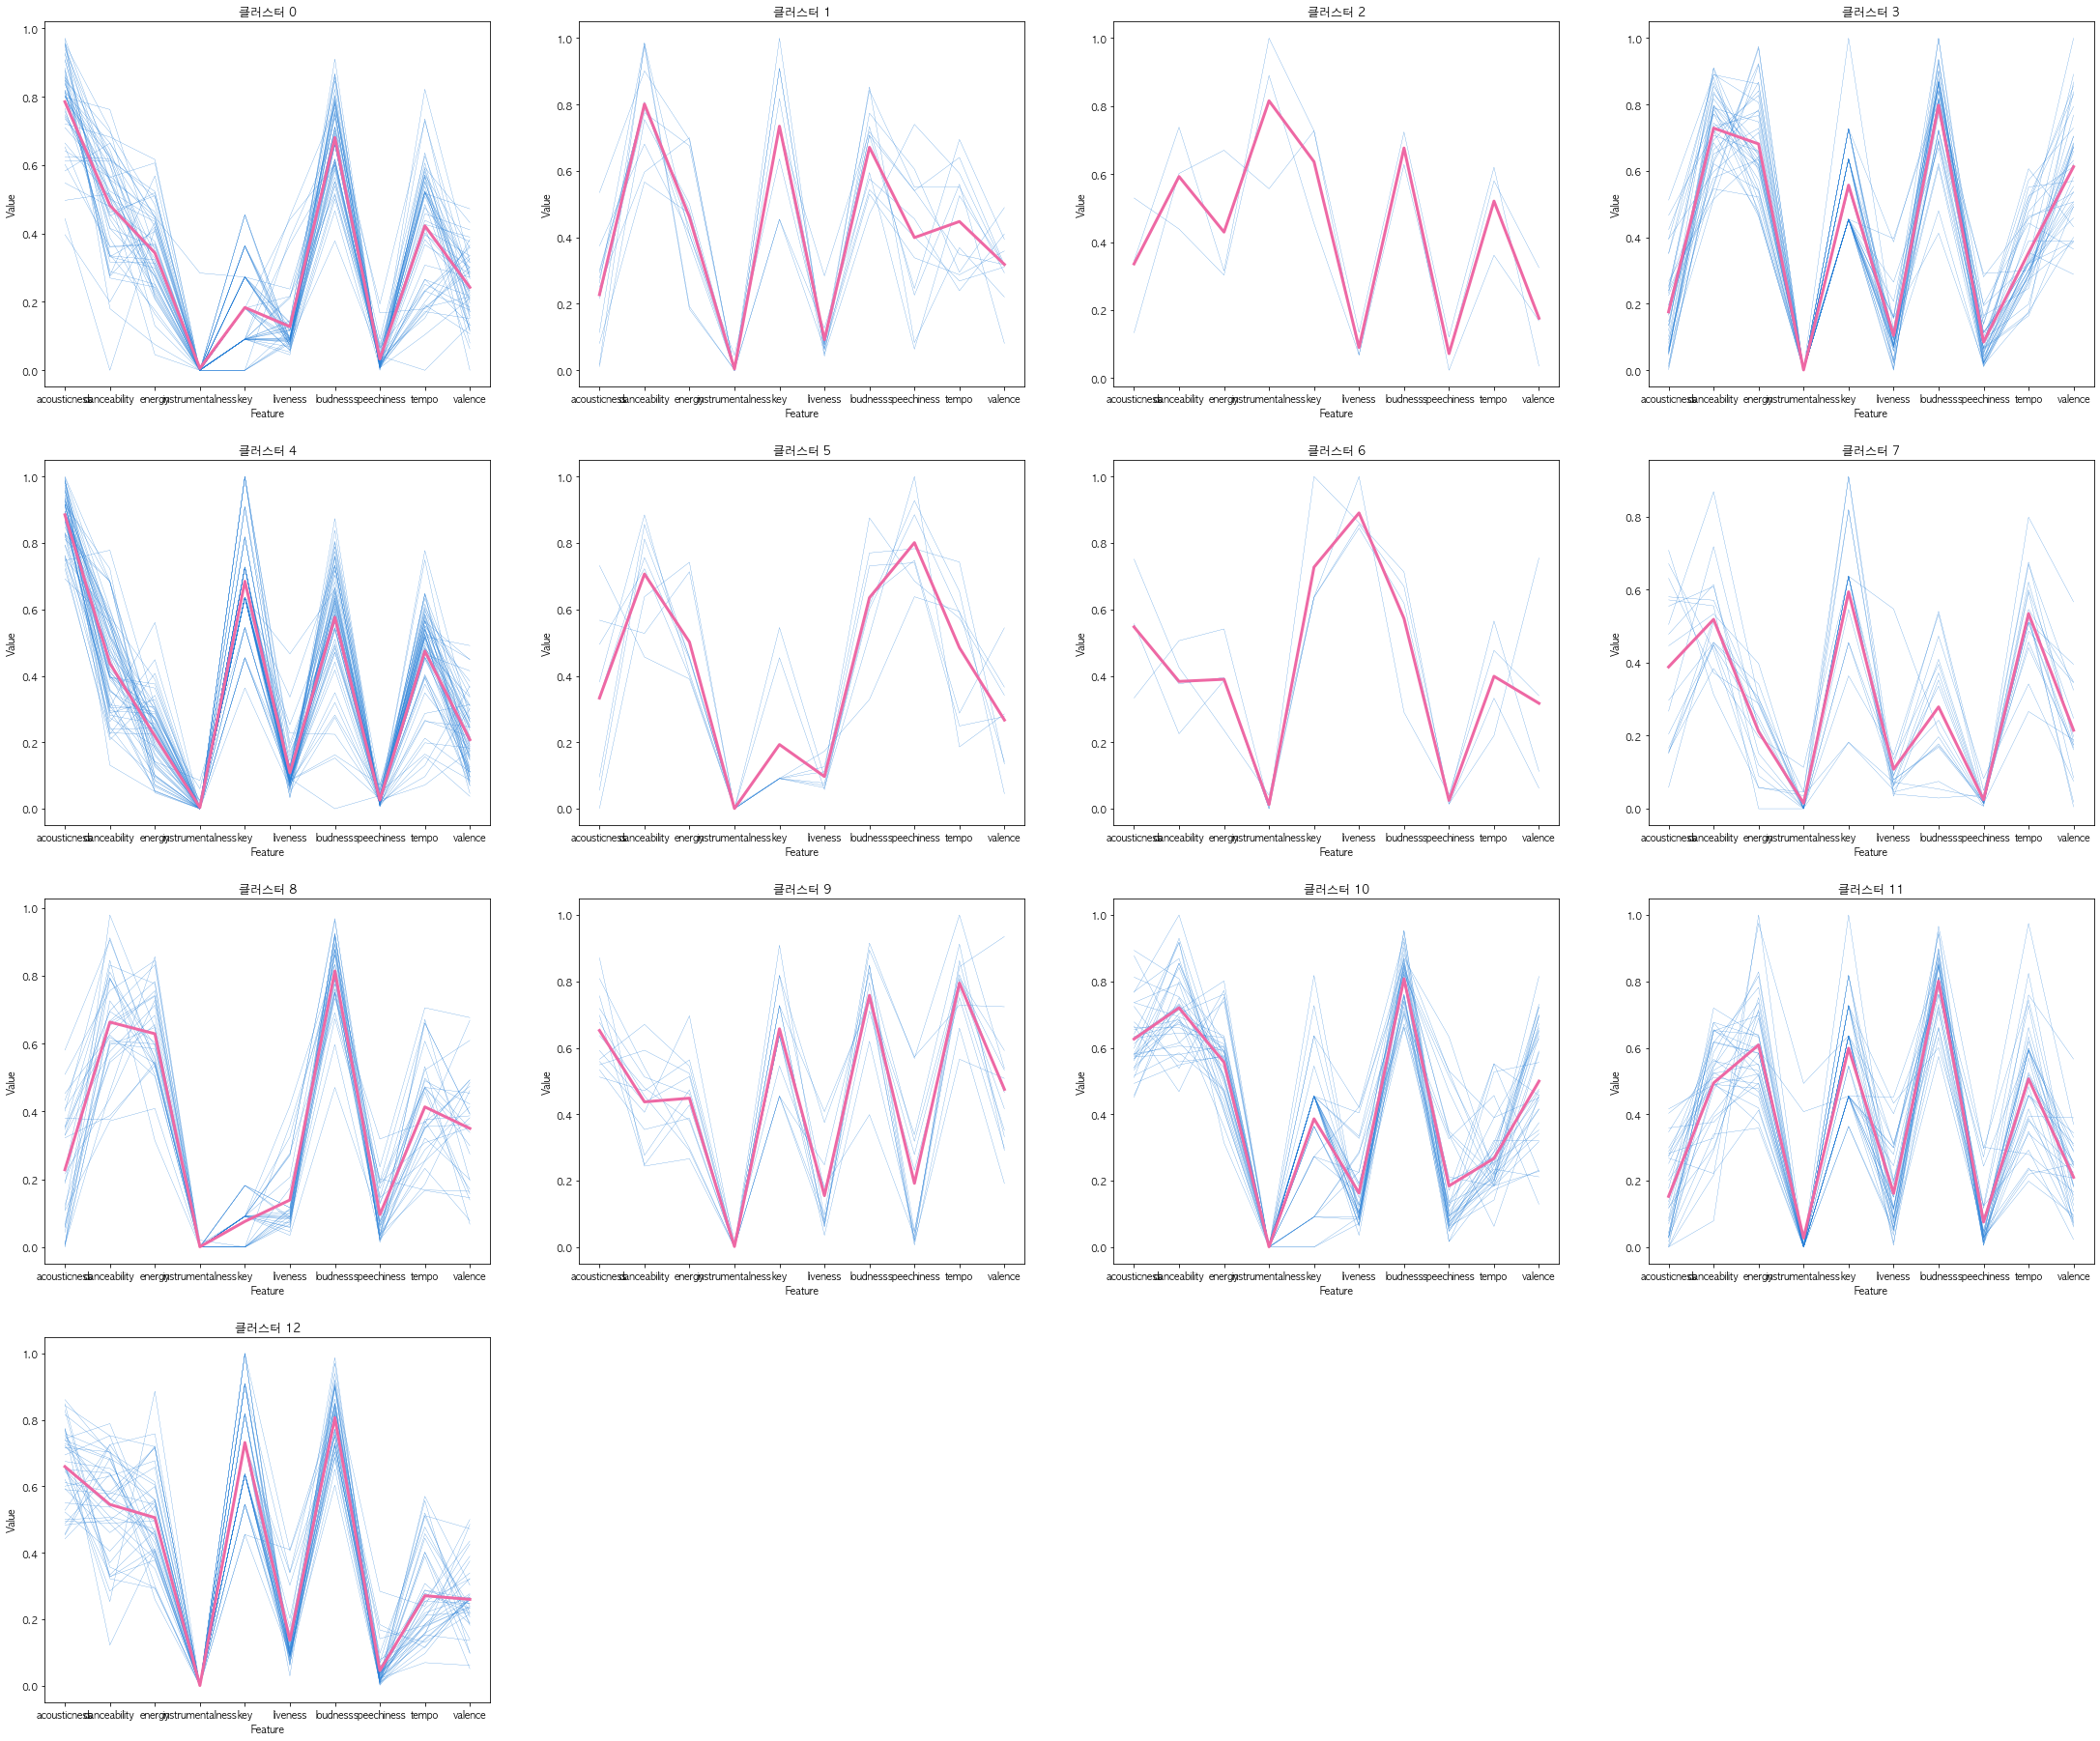

In [14]:
recommender.run()

clear_output(wait=True)
recommender.draw_cluster()

## 5. Recommend Cluster Parsing

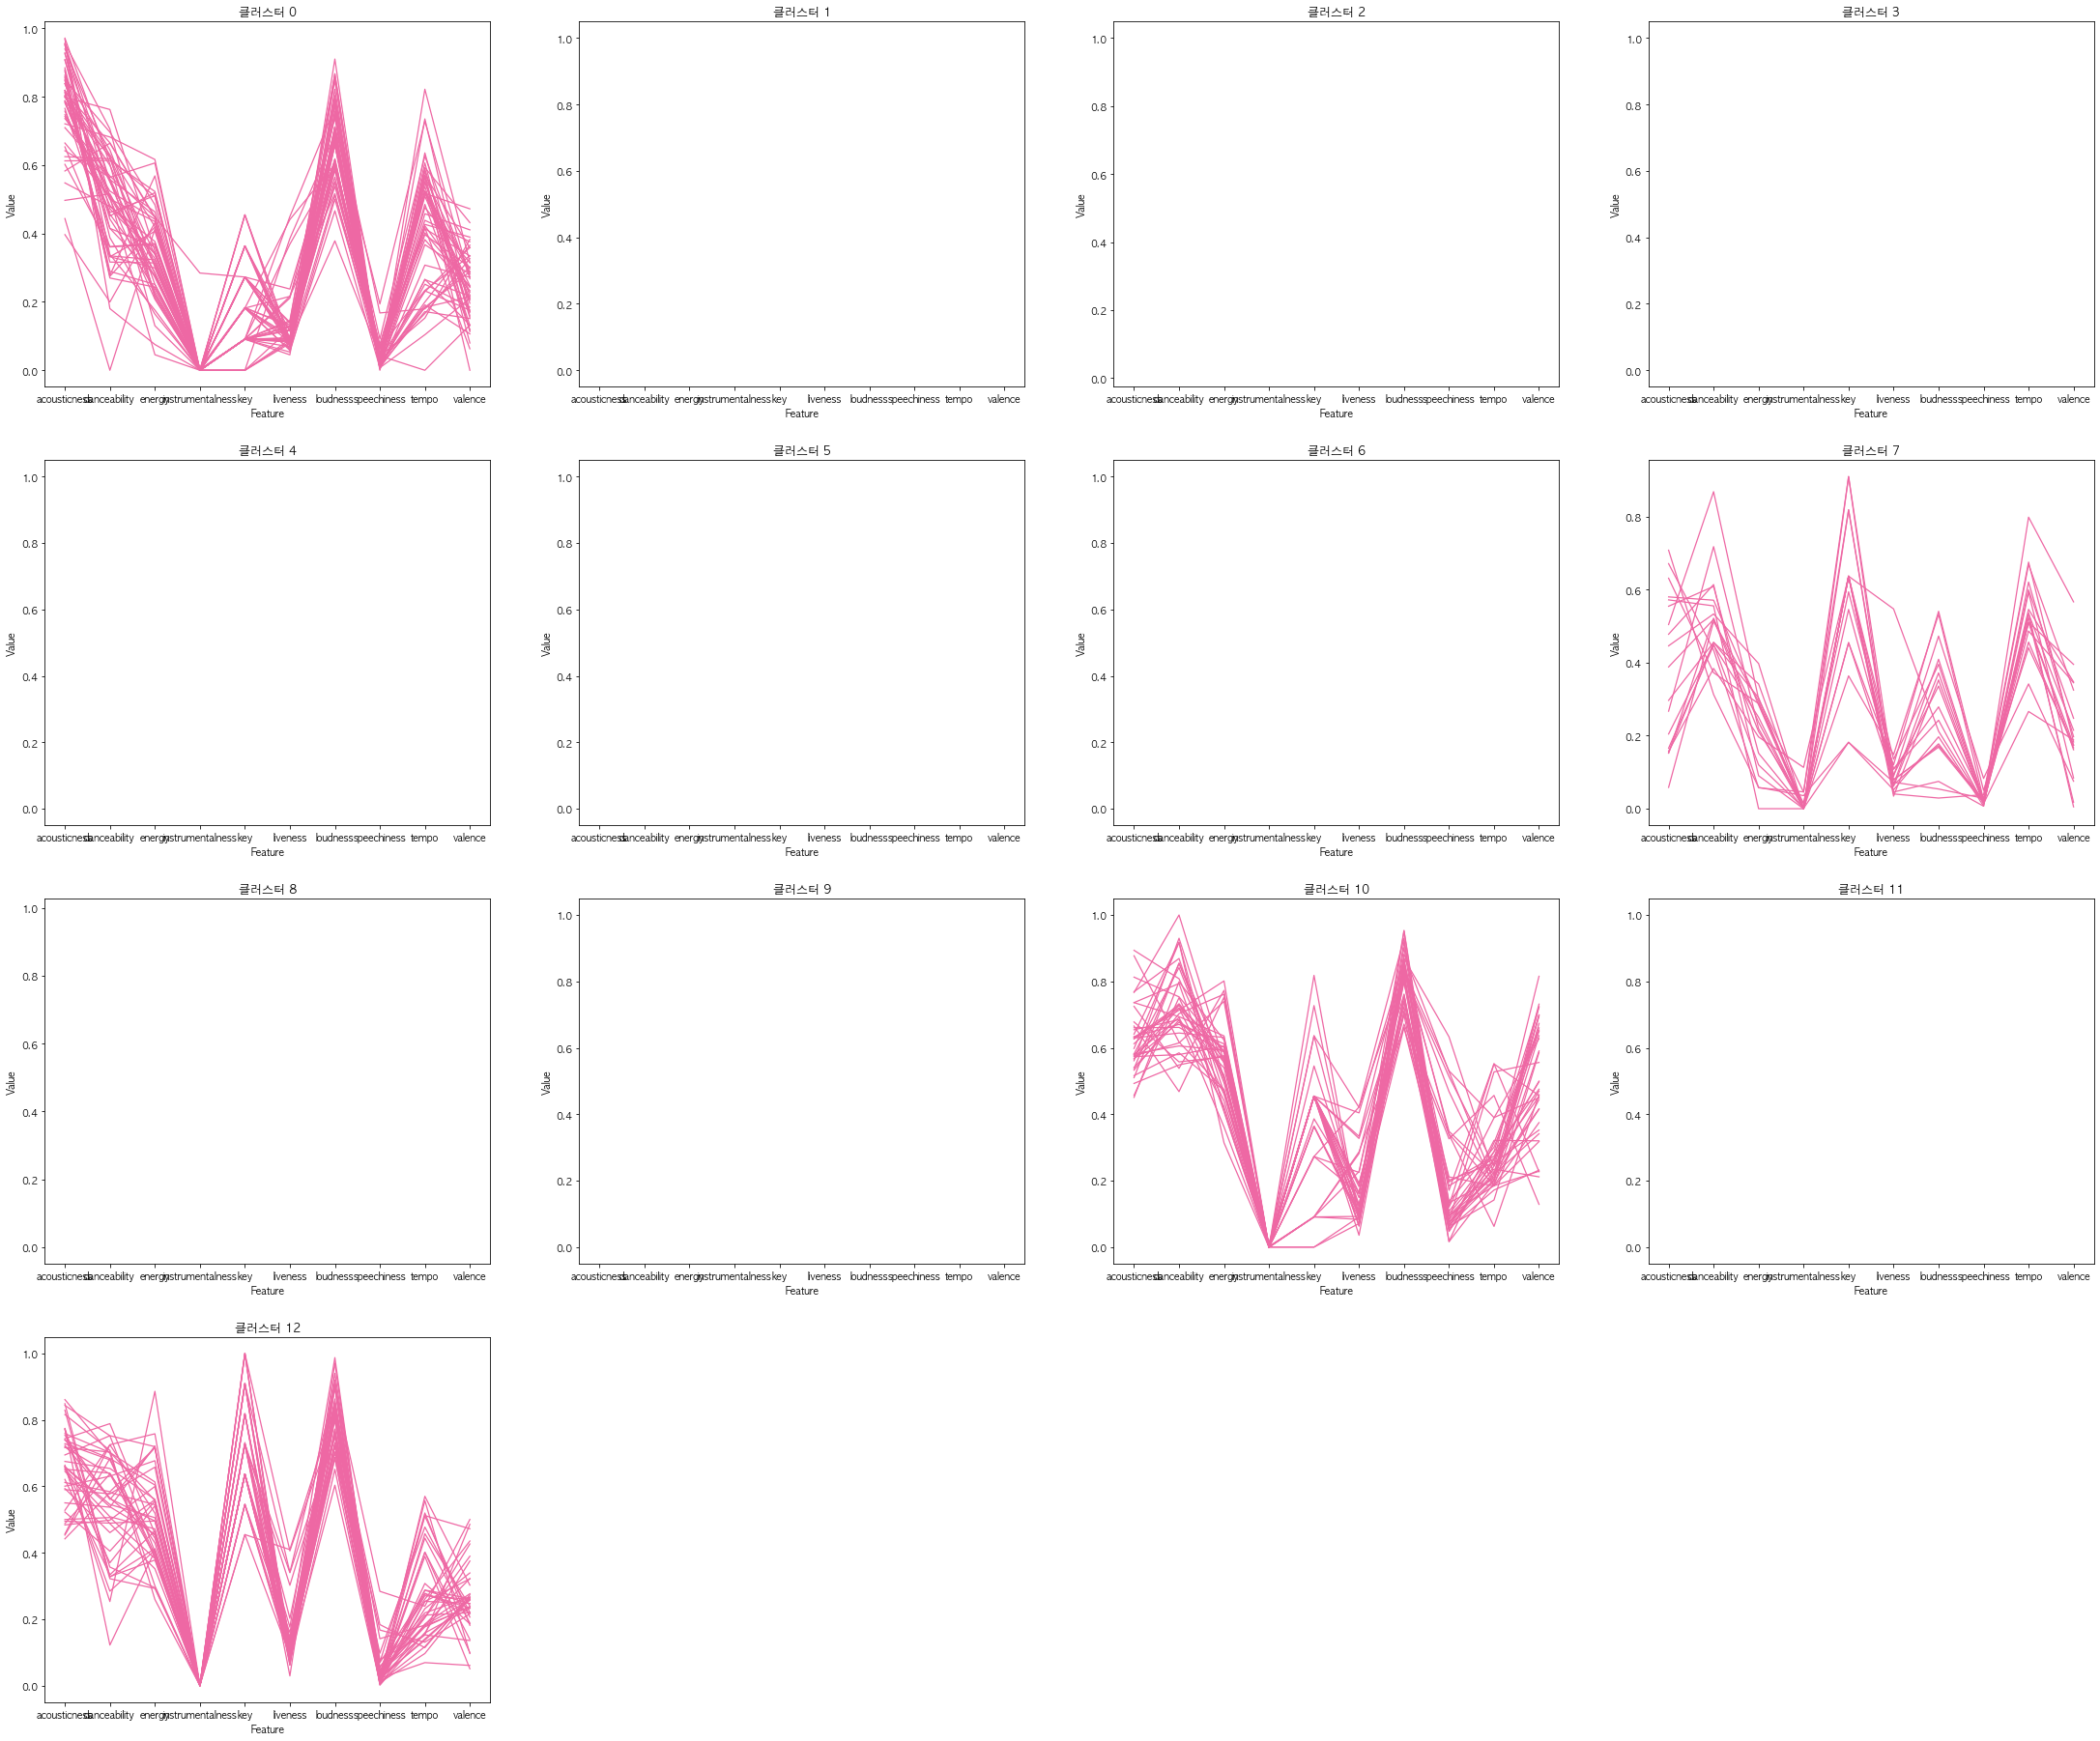

In [15]:
recommender.parse_reco_cluster()

recommender.draw_cluster()

In [16]:
print("총 {}개의 추천음악이 선정 되었습니다.".format(recommender.reco_['tracks']['trackId'].size))
recommender.reco_['tracks'].head()

총 142개의 추천음악이 선정 되었습니다.


,trackId,trackName,artistIds,artistNames,image,seedId
0,6y6jbcPG4Yn3Du4moXaenr,idfc,2cFrymmkijnjDg9SS92EPM,blackbear,https://i.scdn.co/image/ab67616d0000b273bf33fd...,3kNGEbIhTWU0L6RslcXPXr
1,3AKMTInwWSxtMZdDrtUwlb,How much I love you (with Jeong Haeil),4GAVUIrGNz35VbCFfHTsca,saevom,https://i.scdn.co/image/ab67616d0000b273cda6b9...,3kNGEbIhTWU0L6RslcXPXr
2,5MZNGxnfhoOro2mvPjtVlA,Warmhearted,6qvVoPGEqNCyYSjYCgfV1v,Choi Yuree,https://i.scdn.co/image/ab67616d0000b2739374ed...,3kNGEbIhTWU0L6RslcXPXr
3,4m9Badp5xjHRXcPjsSPqHk,가끔 미치도록 네가 안고 싶어질 때가 있어,09FfoFiVjZZEQ7ZcFVfYts,Autumn Vacation,https://i.scdn.co/image/ab67616d0000b273e29b6e...,3kNGEbIhTWU0L6RslcXPXr
4,1R1mvOZ2cfnM39erhGQ5WQ,나비,57xPD2CfuwxN6Ld7rf2iLG,Vanilla Acoustic,https://i.scdn.co/image/ab67616d0000b273dc978a...,3kNGEbIhTWU0L6RslcXPXr


## 6. 수량 조정 작업

### 1. 많을 경우 전체에서 조정

수량 조정 전
음악 간 표준편차 - 8


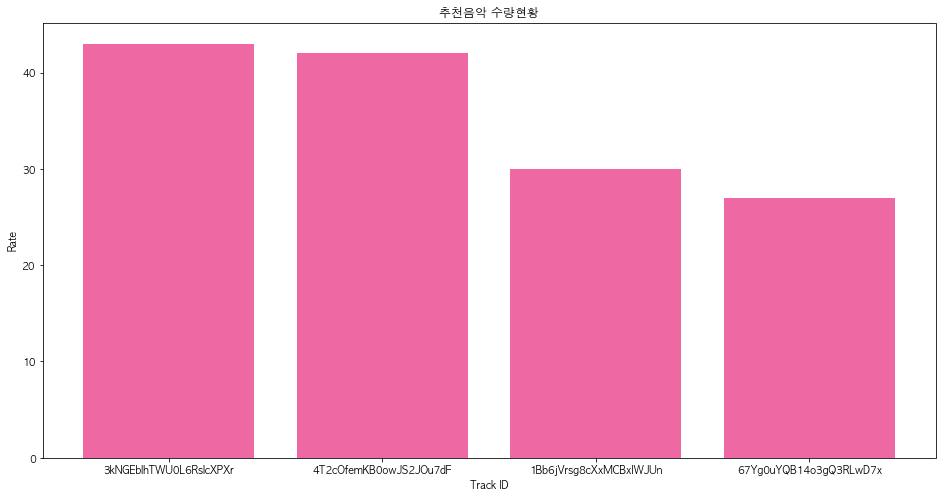

In [17]:
print("수량 조정 전")
recommender.draw_rate()

수량 조정 후
음악 간 표준편차 - 0


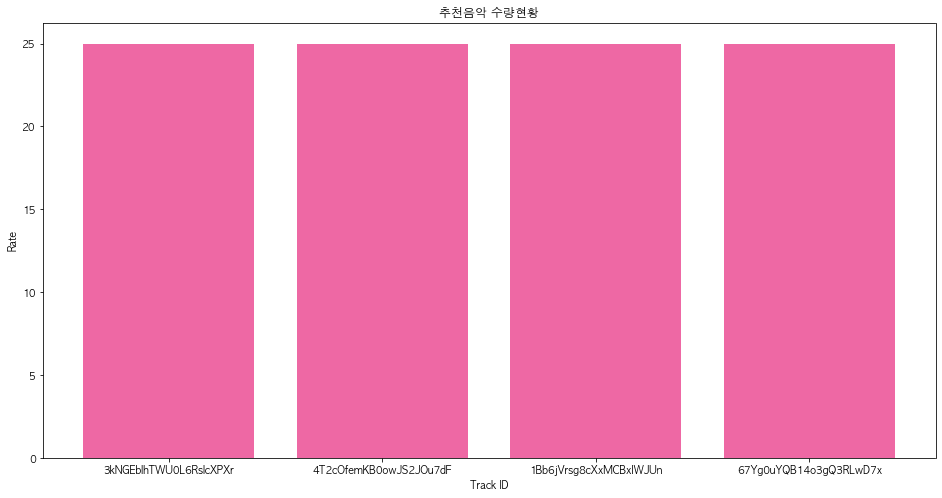

In [18]:
recommender.adjust_rate()

print("수량 조정 후")
recommender.draw_rate()

### 2. 적을 경우 추가 필터링 작업

In [404]:
import pandas as pd
import numpy as np

user = recommender.user.copy()
reco = dict()
for key in recommender.reco.keys():
    reco[key] = recommender.reco[key][
        ~np.isin(recommender.reco[key]['trackId'],recommender.reco_[key]['trackId'])
    ].copy().reset_index(drop=True)
    
print("1차 작업에서 추천된 곡을 제외한 다음의 {}곡들로 추천 작업을 재 진행 합니다.".format(
    reco['tracks']['trackId'].size
))
reco['tracks'].head()

1차 작업에서 추천된 곡을 제외한 다음의 414곡들로 추천 작업을 재 진행 합니다.


,trackId,trackName,artistIds,artistNames,image,seedId
0,5SoN5GIDUG1aNQTuNqsVDu,Just the two of us,3hvinNZRzTLoREmqFiKr1b,CHANGMO,https://i.scdn.co/image/ab67616d0000b273483eb4...,5quFr5s5PXYfUX5jV2EBZ1
1,5zhMMVw097YOSvT0oDGgDV,zombie pop,"0siBQaURCli5wn2lqv8WZg,2o8gT0fQmFxGNbowbdgeZe,...","DPR LIVE,DPR IAN,DPR CREAM",https://i.scdn.co/image/ab67616d0000b273350286...,5quFr5s5PXYfUX5jV2EBZ1
2,4nF3APHarLJHV3igGVgTUJ,Rich Kids Anthem (Feat. Lee Hi),5snNHNlYT2UrtZo5HCJkiw,Epik High,https://i.scdn.co/image/ab67616d0000b2739d75b5...,5quFr5s5PXYfUX5jV2EBZ1
3,7q92TuZKxN4C2FRZuWU8yY,A Gift!,5HenzRvMtSrgtvU16XAoby,Zion.T,https://i.scdn.co/image/ab67616d0000b273d25c57...,5quFr5s5PXYfUX5jV2EBZ1
4,1iDDx2LK2u1baBiaRcvlIH,Beat 'em up,0IznZPMUyaPGdqfP4oqBja,Coogie,https://i.scdn.co/image/ab67616d0000b27395c79a...,5quFr5s5PXYfUX5jV2EBZ1


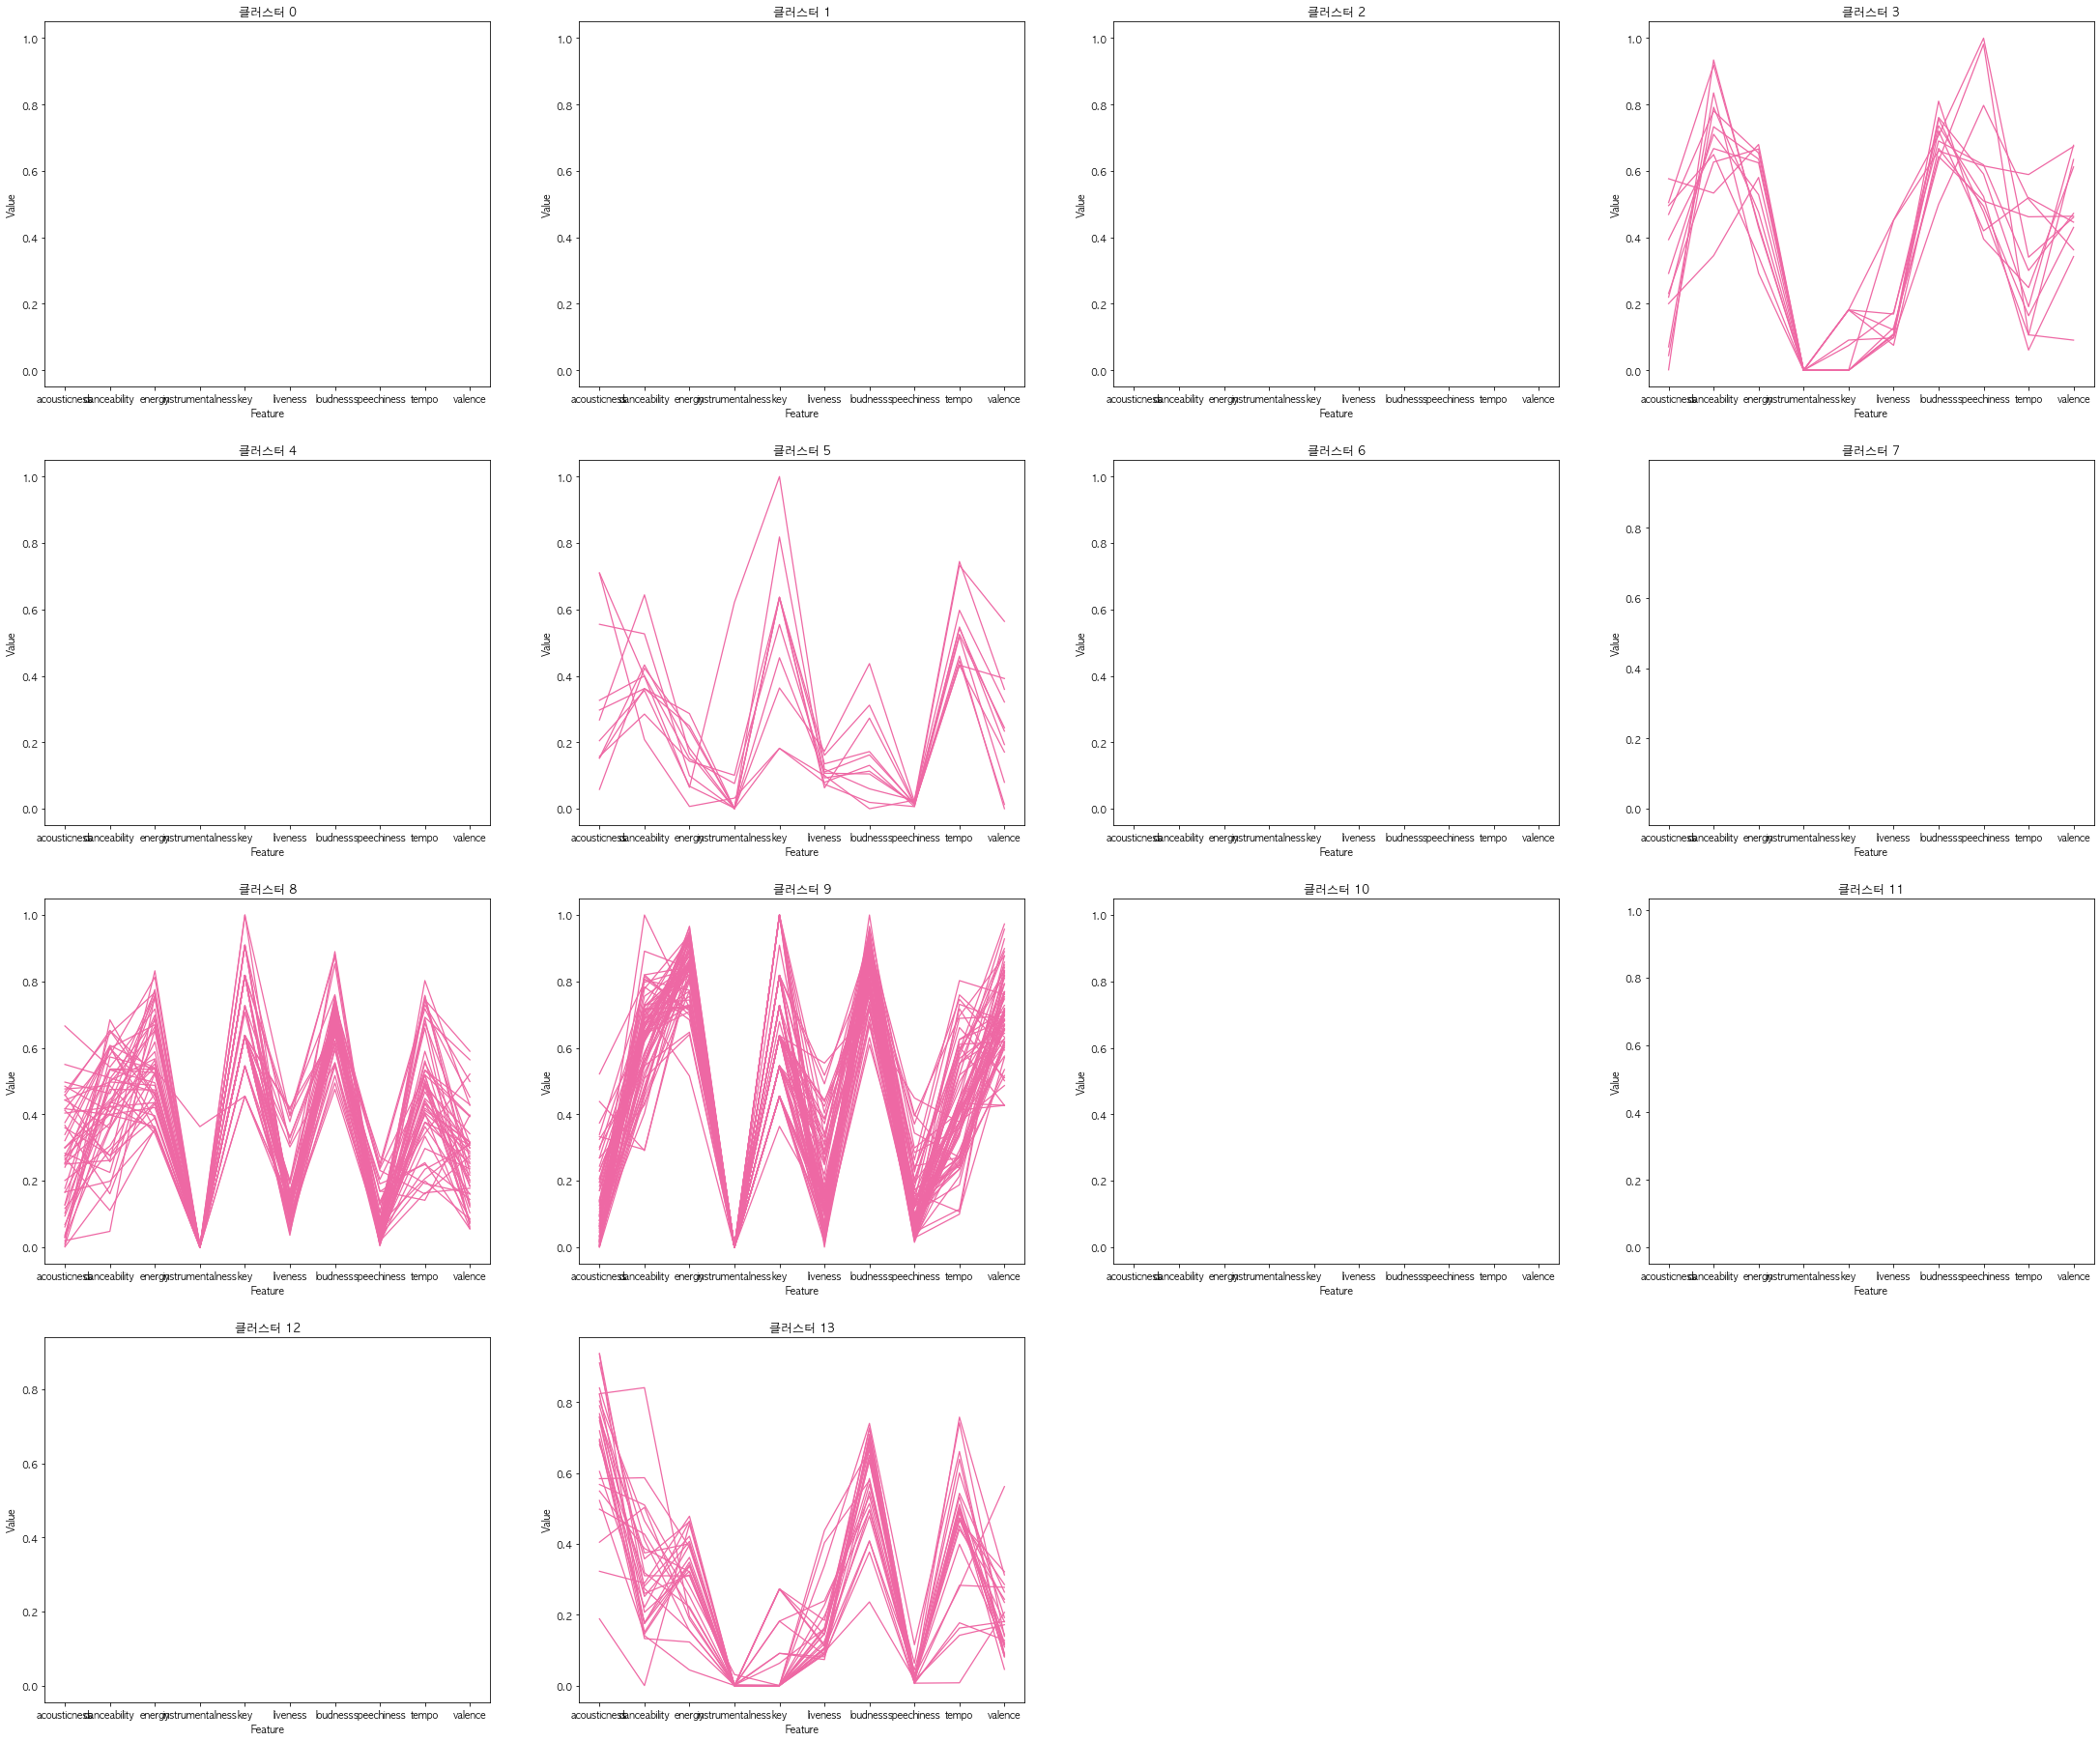

In [405]:
_recommender = Recommender()
_recommender.static_setting(user, reco)
_recommender.merge()
_recommender.data_preprocessing()
_recommender.run()

clear_output(wait=True)
_recommender.parse_reco_cluster()
_recommender.draw_cluster()

In [406]:
for key in recommender.reco_.keys():
    recommender.reco_[key] = pd.concat([
        recommender.reco_[key],
        _recommender.reco_[key]
    ]).reset_index(drop=True)
    
recommender.reco_['tracks'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   trackId      262 non-null    object
 1   trackName    262 non-null    object
 2   artistIds    262 non-null    object
 3   artistNames  262 non-null    object
 4   image        262 non-null    object
 5   seedId       262 non-null    object
dtypes: object(6)
memory usage: 12.4+ KB


수량 조정 후
음악 간 표준편차 - 1


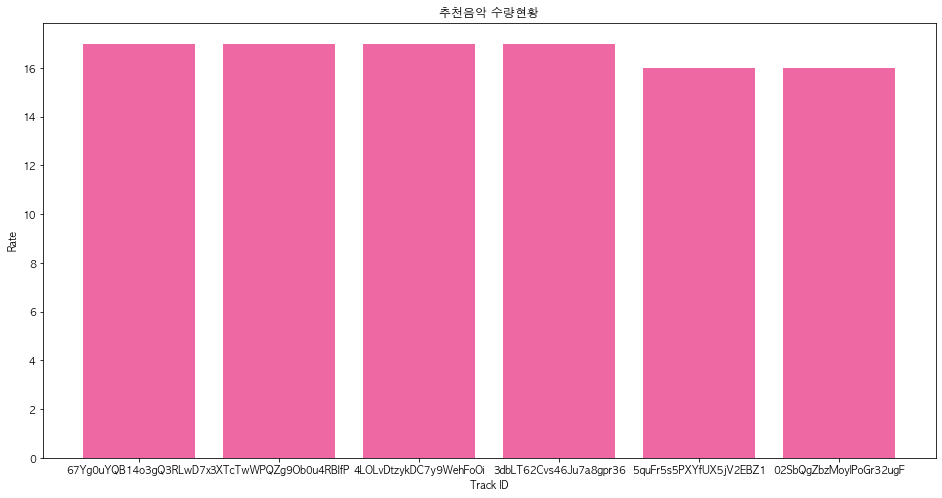

In [407]:
recommender.adjust_rate()

print("수량 조정 후")
recommender.draw_rate()

# Letter
## 최종 추천 음악플레이리스트

총 100개의 추천음악이 선정 되었습니다.


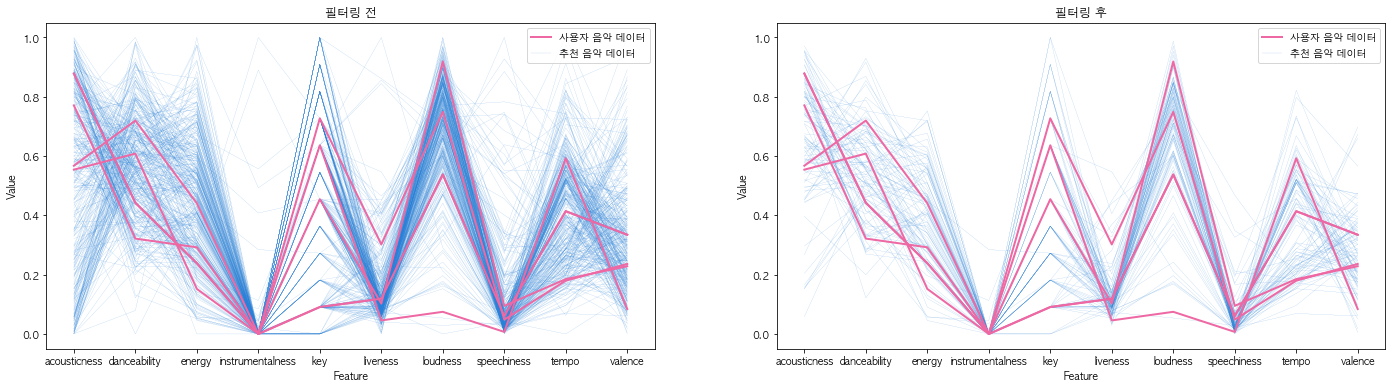

,trackId,trackName,artistIds,artistNames,image,seedId
0,6y6jbcPG4Yn3Du4moXaenr,idfc,2cFrymmkijnjDg9SS92EPM,blackbear,https://i.scdn.co/image/ab67616d0000b273bf33fd...,3kNGEbIhTWU0L6RslcXPXr
1,3AKMTInwWSxtMZdDrtUwlb,How much I love you (with Jeong Haeil),4GAVUIrGNz35VbCFfHTsca,saevom,https://i.scdn.co/image/ab67616d0000b273cda6b9...,3kNGEbIhTWU0L6RslcXPXr
2,5MZNGxnfhoOro2mvPjtVlA,Warmhearted,6qvVoPGEqNCyYSjYCgfV1v,Choi Yuree,https://i.scdn.co/image/ab67616d0000b2739374ed...,3kNGEbIhTWU0L6RslcXPXr
3,4m9Badp5xjHRXcPjsSPqHk,가끔 미치도록 네가 안고 싶어질 때가 있어,09FfoFiVjZZEQ7ZcFVfYts,Autumn Vacation,https://i.scdn.co/image/ab67616d0000b273e29b6e...,3kNGEbIhTWU0L6RslcXPXr
4,1R1mvOZ2cfnM39erhGQ5WQ,나비,57xPD2CfuwxN6Ld7rf2iLG,Vanilla Acoustic,https://i.scdn.co/image/ab67616d0000b273dc978a...,3kNGEbIhTWU0L6RslcXPXr


In [19]:
print("총 {}개의 추천음악이 선정 되었습니다.".format(recommender.reco_['tracks']['trackId'].size))

recommender.draw_filtering()
recommender.reco_['tracks'].head()

In [20]:
mail_id = db.save_mail(recommender)
print("우체통 {}를 위한 음악편지 {}를 넣어놨어요.".format(mailbox_id,mail_id))

우체통 62908cd50f26e903e1de90e0를 위한 음악편지 62908cf50f26e903e1de90e6를 넣어놨어요.
